<a href="https://colab.research.google.com/github/rsmecking/DS-Unit-2-Applied-Modeling/blob/master/module3-permutation-boosting/Ryan_Mecking_LS_DS_233_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv (r'C:\Users\Ryan\Desktop\Coding Stuffs\Project 2 stuff/Datafiniti_Womens_Shoes_Jun19.csv')
print (df.shape)
df.head(3)

(10000, 32)


,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean / upc,...,prices.dateSeen,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,2019-05-01T09:27:22Z,NaN,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,656000000000,...,2019-04-19T07:09:29Z,NaN,NaN,Online only,NaN,NaN,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,2019-05-01T09:27:19Z,NaN,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,NaN,192000000000,...,2019-04-24T09:14:11Z,NaN,NaN,Online only,NaN,NaN,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,2019-05-01T09:26:59Z,NaN,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,709000000000,...,2019-04-25T12:35:00.000Z,NaN,NaN,Online only,NaN,NaN,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...


In [0]:
#Averaging out price of shoe. Most values were the same so it was basically a duplicate column
df['price'] = (df['prices.amountMin'] + df['prices.amountMax'])/2
df.shape

(10000, 33)

In [0]:
# Dropping now useless columns.
df = df.drop(['prices.amountMin', 'prices.amountMax'], axis=1)
df.shape

(10000, 31)

In [0]:
df.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean / upc,...,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,price
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,2019-05-01T09:27:22Z,NaN,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,656000000000,...,NaN,NaN,Online only,NaN,NaN,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...,29.95
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,2019-05-01T09:27:19Z,NaN,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,NaN,192000000000,...,NaN,NaN,Online only,NaN,NaN,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,84.00
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,2019-05-01T09:26:59Z,NaN,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,709000000000,...,NaN,NaN,Online only,NaN,NaN,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,49.95
3,AWpyxomE0U_gzG0hkA1q,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black/Multi,NaN,884000000000,...,NaN,NaN,Online only: 20% off,NaN,NaN,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,127.20
4,AWpyxChWJbEilcB6RhWx,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,White,NaN,887000000000,...,NaN,NaN,Online only: 50% off,NaN,NaN,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,47.66


In [0]:
# df['prices.size'].value_counts()

In [0]:
df['price'].describe()

count    10000.000000
mean        72.202721
std        172.400446
min          5.500000
25%         34.990000
50%         52.485000
75%         83.962500
max       5000.000000
Name: price, dtype: float64

In [0]:
#Removing outliers 
df = df[(df['price'] <= np.percentile(df['price'], 99.5))]
df.shape

(9950, 31)

In [0]:
df['price'].describe()

count    9950.000000
mean       65.168357
std        40.993896
min         5.500000
25%        34.990000
50%        52.200000
75%        83.682500
max       260.590000
Name: price, dtype: float64

In [0]:
# df['price'].value_counts().head(50)

In [0]:
#Filling in missing values with word "missing" for imputing reason
df = df.fillna("Missing")

In [0]:
#Making all upper casing to lower casing in name/color columns
df['name'] = df['name'].str.lower()
df['prices.color'] = df['prices.color'].str.lower()

In [0]:
# Looking for most common used words in 'name' column.
df1 = (df['name'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
# df1.head(10)

In [0]:
df1 = df1.replace(["women's", 'womens', "/", "-", 'on', 'co.', 'by',
                   'and'], "Missing")
# df1['vals'].values[:200]

In [0]:
# Looking for most common used words in 'color' column.
df2 = (df['colors'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
# df2.head(50)

In [0]:
df2 = df2.replace(["/"], "Multi")
# df2['vals'].values[:200]

In [0]:
df3 = (df['prices.size'].str.split(expand=True)
              .stack()
              .value_counts()
              .rename_axis('vals')
              .reset_index(name='count'))
# df3.head(60)

In [0]:
df3 = df3.replace(["Standard", 'Women', "/", "-", 'Size', 'US', 'BM'], "Multi")
# df3['vals'].values[:58]

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                               random_state=42)
train.shape, test.shape

((7960, 31), (1990, 31))

In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape

((6368, 31), (1592, 31))

In [0]:
#imports
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import plotly.express as px
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [0]:
#Features

def wrangle(X):
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    #Top descriptive words from 'name' column  
    mylist = df1['vals'].values[:150]
    
    for i in mylist:
        X[i] = X['name'].str.contains(i) 
    
    #Top descriptive words from 'prices.color' column  
    color_list = df2['vals'].values[:200]
    
    for j in color_list:
        X[j] = X['prices.color'].str.contains(j)
    
    #Top descriptive words from 'Size' column  
    size_list = df3['vals'].values[:58]
    
    for k in size_list:
        X[k] = X['prices.size'].str.contains(k) 
        
    # Does the shoe have a description?
    X['name'] = X['name'].str.strip().fillna('')
    X['has_description'] = X['name'] != ''

    # How long is the description?
    X['name_length'] = X['name'].str.len()
  
    #Dropping all columns with over 99% NaNs or repeated column.
    lon = ['dateAdded','dateUpdated', 'asins', 'primaryCategories','colors','dimension', 
           'imageURLs', 'keys', 'prices.dateAdded','prices.condition', 'prices.merchant', 
           'prices.dateSeen', 'prices.returnPolicy', 'prices.sourceURLs', 'sizes',                
           'prices.sourceURLs', 'prices.condition', 'sourceURLs']
           
    X = X.drop(columns=lon, axis=1)
    
    #Removing seeding columns from above for loops.
    seeds= ['name', 'prices.color','prices.size' ]
    X = X.drop(columns=seeds, axis=1)
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

E:\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [0]:
# The status_group column is the target
target = 'price'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality 
categorical_features = cardinality[cardinality <= 550].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
#Target/Val assignment

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
X_train.shape, X_val.shape, X_test.shape

((6368, 399), (1592, 399), (1990, 399))

In [0]:
X_train.head(50)

,ean / upc,name_length,brand,categories,manufacturer,manufacturerNumber,prices.availability,prices.currency,prices.isSale,prices.offer,...,15,11M,35,X-Wide,16,5.5M,5M,Wide,4.5,has_description
7742,728816000000,28,SAS,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Missing,Missing,False,USD,Missing,Online only,...,False,False,False,False,False,False,False,False,False,True
6628,812000000000,45,Genuine Grip,"Womens Shoes,Clothing,All Womens Shoes,Shoes",Missing,Missing,True,USD,Missing,Online only: 24% off,...,False,False,False,False,False,False,False,False,False,True
306,728000000000,60,Carlos,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Missing,Missing,True,USD,Missing,Online only: 52% off,...,False,False,False,False,False,False,False,False,False,True
5258,825000000000,43,Aerosoles,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Missing,Missing,True,USD,Missing,Online only: 20% off,...,False,False,False,False,False,False,False,False,False,True
9638,870000000000,66,Brinley Co.,"Womens Flats D*Orsay,Womens Shoes,Women's Shoe...",Brinley Co.,ELLIE-BLU-060,True,USD,False,Online only: 64% off,...,False,False,False,False,False,False,False,False,False,True
3775,885308000000,52,David Tate,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Missing,Missing,False,USD,Missing,Online only,...,False,False,False,False,False,False,False,False,False,True
6823,756000000000,47,Propet,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Missing,Missing,False,USD,Missing,Online only,...,False,False,False,False,False,False,False,False,False,True
4412,800000000000,60,OwnShoe,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Missing,Missing,True,USD,Missing,Online only,...,False,False,False,False,False,False,False,False,False,True
5100,706000000000,64,Alfani,"Womens Shoes,Clothing,All Womens Shoes,Shoes",Missing,Missing,True,USD,Missing,Online only: 61% off,...,False,False,False,False,False,False,False,False,False,True
9119,886000000000,25,Propet,"Womens Shoes,Clothing,All Womens Comfort,Dress...",Propet,W3247-BLU,False,USD,False,Online only,...,False,False,False,False,False,False,False,False,False,True


In [0]:
X_train.dtypes

ean / upc           int64
name_length         int64
brand              object
categories         object
manufacturer       object
                    ...  
5.5M                 bool
5M                   bool
Wide                 bool
4.5                  bool
has_description      bool
Length: 399, dtype: object

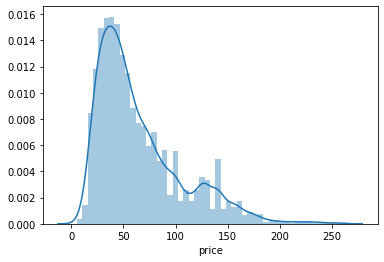

In [0]:
y = df['price']
sns.distplot(y);

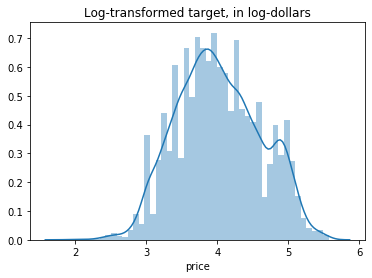

In [0]:
y_log = np.log1p(y)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')
warnings.filterwarnings(action='ignore', category=RuntimeWarning, module='sklearn')
warnings.filterwarnings(action='ignore', category=RuntimeWarning, module='scipy')

In [0]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('R^2 Score=', pipeline.score(X_val, y_val))

R^2 Score= 0.6502116316049856


In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_train = [y_train.mean()] * len(y_train)
y_pred_val  = [y_train.mean()] * len(y_val)

print('Mean Baseline:')
print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('val Root Mean Square Error:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('val Mean Absolute Error:', mean_absolute_error(y_val, y_pred_val))
print('Train R^2 Score:', r2_score(y_train, y_pred_train))
print('val R^2 Score:', r2_score(y_val, y_pred_val))

Mean Baseline:
Train Root Mean Squared Error: 41.40722877922959
val Root Mean Square Error: 40.343225227898635
Train Mean Absolute Error: 32.34957952154805
val Mean Absolute Error: 32.02194338526833
Train R^2 Score: -2.220446049250313e-16
val R^2 Score: -9.672071927324666e-05


In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

for k in range(1, len(X_train_encoded.columns)+1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_val_selected = selector.transform(X_val_scaled)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    print(f'Test MAE: ${mae:,.0f} \n')

1 features
Test MAE: $29 

2 features
Test MAE: $28 

3 features
Test MAE: $27 

4 features
Test MAE: $27 

5 features
Test MAE: $26 

6 features
Test MAE: $26 

7 features
Test MAE: $26 

8 features
Test MAE: $26 

9 features
Test MAE: $26 

10 features
Test MAE: $25 

11 features
Test MAE: $25 

12 features
Test MAE: $25 

13 features
Test MAE: $25 

14 features
Test MAE: $25 

15 features
Test MAE: $24 

16 features
Test MAE: $24 

17 features
Test MAE: $24 

18 features
Test MAE: $24 

19 features
Test MAE: $24 

20 features
Test MAE: $23 

21 features
Test MAE: $23 

22 features
Test MAE: $23 

23 features
Test MAE: $23 

24 features
Test MAE: $23 

25 features
Test MAE: $23 

26 features
Test MAE: $23 

27 features
Test MAE: $23 

28 features
Test MAE: $23 

29 features
Test MAE: $23 

30 features
Test MAE: $23 

31 features
Test MAE: $23 

32 features
Test MAE: $23 

33 features
Test MAE: $23 

34 features
Test MAE: $23 

35 features
Test MAE: $22 

36 features
Test MAE: $22 

3

In [0]:
from sklearn.linear_model import LinearRegression

def lr(X_train, X_val, features, target):

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
#     print(f'Linear Regression with {len(features)} features')
#     print('Intercept', model.intercept_)
#     coefficients = pd.Series(model.coef_, features)
#     print(coefficients.to_string())
    
    print('Train Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print('Val Root Mean Square Error:', np.sqrt(mean_squared_error(y_val, y_pred_val)))
    print('Train Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
    print('Val Mean Absolute Error:', mean_absolute_error(y_val, y_pred_val))
    print('Train R^2 Score:', r2_score(y_train, y_pred_train))
    print('Val R^2 Score:', r2_score(y_val, y_pred_val))
    return True

In [0]:
lr(X_train_encoded, X_val_encoded, features, target)

Train Root Mean Squared Error: 28.02685563474669
Val Root Mean Square Error: 27.9076628555328
Train Mean Absolute Error: 19.379969638016764
Val Mean Absolute Error: 19.481178258892474
Train R^2 Score: 0.541861888545986
Val R^2 Score: 0.5214275332873504


True

In [0]:
#setting up transformer to implement eli5
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = LinearRegression()
model.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#setting up transformer to implement eli5
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring=None, 
    n_iter=5, 
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                      n_iter=5, random_state=42, refit=True, scoring=None)

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

skimmers       -0.000942
8              -0.000868
ean / upc      -0.000863
sunny          -0.000816
boots          -0.000808
                  ...   
prices.offer    0.051905
classified      0.074016
boot            0.094717
drew            0.096571
sas,            0.303932
Length: 399, dtype: float64

In [0]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names)

Weight,Feature
0.3039 ± 0.0152,"sas,"
0.0966 ± 0.0226,drew
0.0947 ± 0.0154,boot
0.0740 ± 0.0045,classified
0.0519 ± 0.0081,prices.offer
0.0513 ± 0.0154,prices.isSale
0.0395 ± 0.0136,city
0.0381 ± 0.0099,tate
0.0274 ± 0.0054,ww
0.0243 ± 0.0057,inch


In [0]:
#Removing features that don't contribute
minimum_importance = 0
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train = X_train[features]
X_val = X_val[features]

In [0]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Val R^2 Score=', pipeline.score(X_val, y_val))

R^2 Score= 0.6034823736626524


In [0]:
from xgboost import XGBRegressor
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBRegressor(
    booster='dart',
    n_estimators=1000, 
    max_depth=7,      
    learning_rate=0.5, 
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,  
          early_stopping_rounds=50) 

[17:57:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:47.2542	validation_1-rmse:46.0823
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:35.3962	validation_1-rmse:35.5988
[2]	validation_0-rmse:30.1085	validation_1-rmse:31.7044
[3]	validation_0-rmse:28.1687	validation_1-rmse:30.3604
[4]	validation_0-rmse:26.1906	validation_1-rmse:29.0945


E:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

E:\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[5]	validation_0-rmse:23.9776	validation_1-rmse:28.1262
[6]	validation_0-rmse:23.0536	validation_1-rmse:27.759
[7]	validation_0-rmse:22.7548	validation_1-rmse:27.6319
[8]	validation_0-rmse:22.4063	validation_1-rmse:27.5378
[9]	validation_0-rmse:21.8186	validation_1-rmse:27.2715
[10]	validation_0-rmse:21.003	validation_1-rmse:27.169
[11]	validation_0-rmse:20.3599	validation_1-rmse:26.7097
[12]	validation_0-rmse:19.9014	validation_1-rmse:26.4482
[13]	validation_0-rmse:19.1441	validation_1-rmse:25.8298
[14]	validation_0-rmse:18.887	validation_1-rmse:25.7923
[15]	validation_0-rmse:18.3014	validation_1-rmse:25.5882
[16]	validation_0-rmse:18.2079	validation_1-rmse:25.5048
[17]	validation_0-rmse:17.6699	validation_1-rmse:25.5522
[18]	validation_0-rmse:17.1543	validation_1-rmse:25.4425
[19]	validation_0-rmse:17.0447	validation_1-rmse:25.3681
[20]	validation_0-rmse:16.8187	validation_1-rmse:25.4797
[21]	validation_0-rmse:16.5913	validation_1-rmse:25.3943
[22]	validation_0-rmse:16.3855	validatio

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

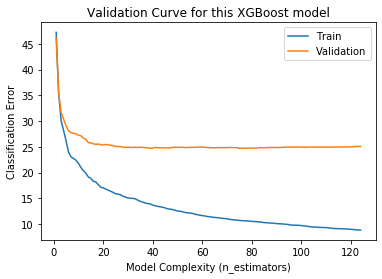

In [0]:
#Graphing the above
results = model.evals_result()
train_error = results['validation_0']['rmse']
val_error = results['validation_1']['rmse']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')

plt.legend();